In [1]:
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
from io import BytesIO

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [2]:

def vesta_image():
    """
    Return an image of Vesta's topography.

    Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI

    Returns
    -------
    img : numpy array
        The pixels of the image in a numpy array.
    img_proj : cartopy CRS
        The rectangular coordinate system of the image.
    img_extent : tuple of floats
        The extent of the image ``(x0, y0, x1, y1)`` referenced in
        the ``img_proj`` coordinate system.

    """
    url = 'https://www.nasa.gov/sites/default/files/pia17037.jpg'
    img_handle = BytesIO(urlopen(url).read())
    raw_image = Image.open(img_handle)
    # The image is extremely high-resolution, which takes a long time to
    # plot. Sub-sampling reduces the time taken to plot while not
    # significantly altering the integrity of the result.
    smaller_image = raw_image.resize([raw_image.size[0] // 10,
                                      raw_image.size[1] // 10])
    img = np.asarray(smaller_image)
    # We define the semimajor and semiminor axes, but must also tell the
    # globe not to use the WGS84 ellipse, which is its default behaviour.
    img_globe = ccrs.Globe(semimajor_axis=285000., semiminor_axis=229000.,
                           ellipse=None)
    img_proj = ccrs.PlateCarree(globe=img_globe)
    img_extent = (-895353.906273091, 895353.906273091,
                  447676.9531365455, -447676.9531365455)
    return img, img_globe, img_proj, img_extent


def main():
    img, globe, crs, extent = vesta_image()
    projection = ccrs.Geostationary(globe=globe)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    ax.imshow(img, transform=crs, extent=extent)
    fig.text(.075, .012, "Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI",
             bbox={'facecolor': 'w', 'edgecolor': 'k'})
    plt.show()


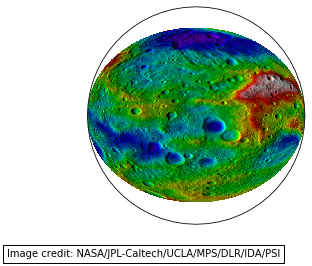

In [3]:
main()